In [1]:
from train_v0 import *

/home/ubuntu/.local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
model = PL_resnet50().eval().cuda(device=0)

In [4]:
pretrained_model = PL_resnet50.load_from_checkpoint(checkpoint_path ="/home/ubuntu/hydra_scratch/lightning_logs/version_5/checkpoints/epoch=9-step=16320.ckpt").eval().cuda(device=0)

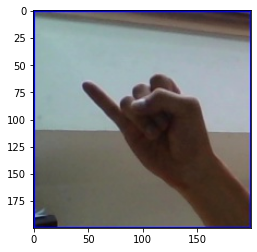

In [5]:
frame = cv2.cvtColor(cv2.imread("/home/ubuntu/hydra_scratch/data/asl_alphabet_test/asl_alphabet_test/J_test.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(frame)

In [6]:
img = data_transform(frame)
img = img.float().unsqueeze(0).cuda(0)
y_hat = pretrained_model(img).data.cpu()

In [7]:
y_hat = torch.argmax(y_hat,dim=1)

In [8]:
y_hat.cpu().detach().numpy().tolist()

[10]